## Project Objective : Building an Regression model to predict the Homestay prices of Residential Properties

In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

In [2]:
df = pd.read_excel('Air_BNB.xlsx')

In [3]:
df.drop('id',axis=1,inplace=True)

In [4]:
print("The number of colums is",df.shape[1])
print("The number of rows is",df.shape[0])

The number of colums is 10
The number of rows is 74111


In [5]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  float64
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(7), object(3)
memory usage: 5.7+ MB


In [7]:
round(df.describe(include='all'),2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
room_type,74106,3,Entire home/apt,41308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,74108.0,NaN,NaN,NaN,3.16,2.15,1.0,2.0,2.0,4.0,16.0
bathrooms,73908.0,NaN,NaN,NaN,1.24,0.58,0.0,1.0,1.0,1.0,8.0
cancellation_policy,74103,3,strict,32500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cleaning_fee,74107.0,NaN,NaN,NaN,0.73,0.44,0.0,0.0,1.0,1.0,1.0
instant_bookable,74111,2,f,54660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_scores_rating,57389.0,NaN,NaN,NaN,94.07,7.84,20.0,92.0,96.0,100.0,100.0
bedrooms,74019.0,NaN,NaN,NaN,1.27,0.85,0.0,1.0,1.0,1.0,10.0
beds,73980.0,NaN,NaN,NaN,1.71,1.25,0.0,1.0,1.0,2.0,18.0
log_price,74111.0,NaN,NaN,NaN,4.78,0.72,0.0,4.32,4.71,5.22,7.6


In [8]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),':', df['room_type'].nunique())
        print()
        print(df[column].value_counts())
        print()

ROOM_TYPE : 3

room_type
Entire home/apt    41308
Private room       30635
Shared room         2163
Name: count, dtype: int64

CANCELLATION_POLICY : 3

cancellation_policy
strict      32500
flexible    22543
moderate    19060
Name: count, dtype: int64

INSTANT_BOOKABLE : 3

instant_bookable
f    54660
t    19451
Name: count, dtype: int64



In [9]:
df.columns

Index(['room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'instant_bookable', 'review_scores_rating', 'bedrooms',
       'beds', 'log_price'],
      dtype='object')

In [10]:
df2 = df.copy()

In [11]:
df2.drop_duplicates(inplace=True)

In [14]:
df2.shape

(54117, 10)

In [15]:
df2.isnull().sum()

room_type                   5
accommodates                3
bathrooms                 195
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    10215
bedrooms                   92
beds                      125
log_price                   0
dtype: int64

In [18]:
df2 = pd.get_dummies(df2,columns = ['room_type','cancellation_policy','instant_bookable'],drop_first = True,dtype = float)

In [19]:
df2.head()

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.0,1.0,1.0,5.010635,0.0,0.0,0.0,1.0,0.0
1,7.0,1.0,1.0,93.0,3.0,3.0,5.129899,0.0,0.0,0.0,1.0,1.0
2,5.0,1.0,1.0,92.0,1.0,3.0,4.976734,0.0,0.0,1.0,0.0,1.0
3,4.0,1.0,1.0,NaN,2.0,2.0,6.620073,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,40.0,0.0,1.0,4.744932,0.0,0.0,1.0,0.0,1.0


# Null Value Treatment 

In [20]:
df_mean = df2.copy()

In [21]:
for column in df_mean.columns:
    if df_mean[column].dtype != 'object':
        mean = df_mean[column].mean()
        df_mean[column] = df_mean[column].fillna(mean)    
              

In [22]:
df_med = df2.copy()

In [23]:
for column in df_med.columns:
       
    if df_med[column].dtype != 'object':
       
        median = df_med[column].median()
        
        df_med[column] = df_med[column].fillna(median) 

In [24]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed=imputer.fit_transform(df2)
df_knn = pd.DataFrame(data = df_imputed,columns=df2.columns)

# Outlier Treatment

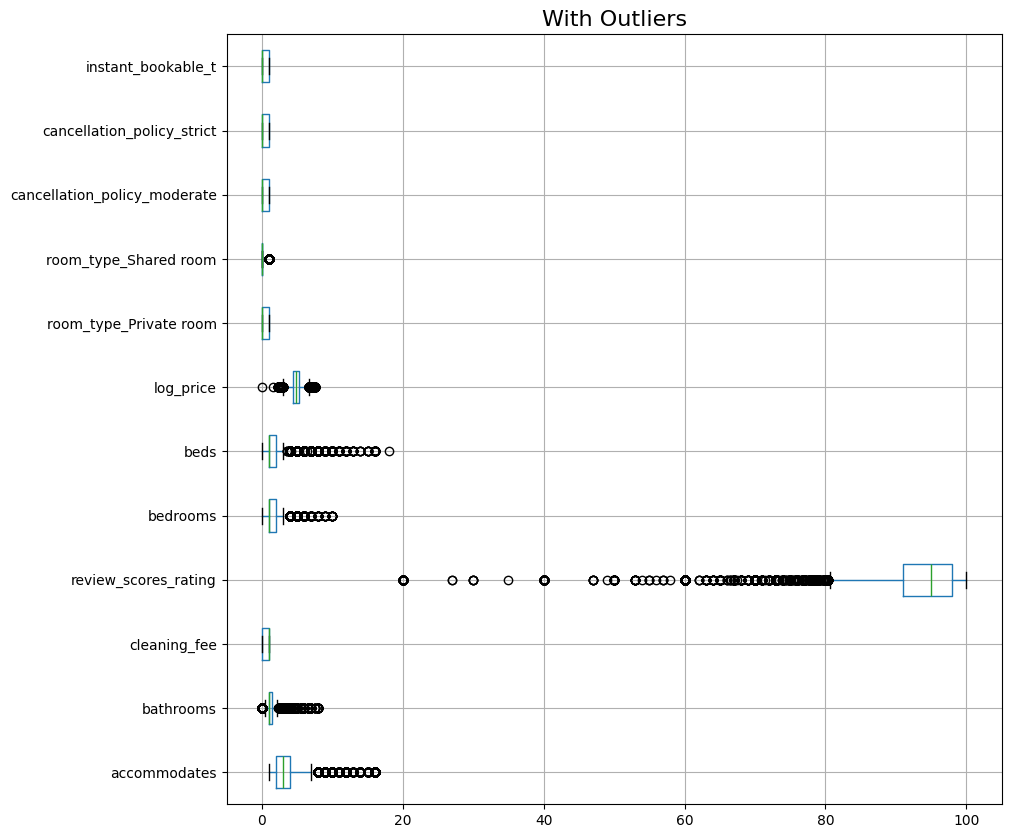

In [25]:
cont=df_knn.dtypes[(df_knn.dtypes!='uint8') & (df_knn.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df_knn[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

# remove outliers

In [26]:
def remove_outlier(col):
    
    sorted(col)
    
    Q1,Q3=np.percentile(col,[25,75])
    
    IQR=Q3-Q1
    
    lower_range= Q1-(1.5 * IQR)
    
    upper_range= Q3+(1.5 * IQR)
    
    return lower_range, upper_range

In [27]:
df_mean_out = df_mean.copy()
df_med_out = df_med.copy()
df_knn_out = df_knn.copy()

In [28]:
for column in df_mean_out.columns:
    lr,ur=remove_outlier(df_mean_out[column])
    df_mean_out[column]=np.where(df_mean_out[column]>ur,ur,df_mean_out[column])
    df_mean_out[column]=np.where(df_mean_out[column]<lr,lr,df_mean_out[column])

In [29]:
for column in df_med_out.columns:
    lr,ur=remove_outlier(df_med_out[column])
    df_med_out[column]=np.where(df_med_out[column]>ur,ur,df_med_out[column])
    df_med_out[column]=np.where(df_med_out[column]<lr,lr,df_med_out[column])

In [30]:
for column in df_knn_out.columns:
    lr,ur=remove_outlier(df_knn_out[column])
    df_knn_out[column]=np.where(df_knn_out[column]>ur,ur,df_knn_out[column])
    df_knn_out[column]=np.where(df_knn_out[column]<lr,lr,df_knn_out[column])

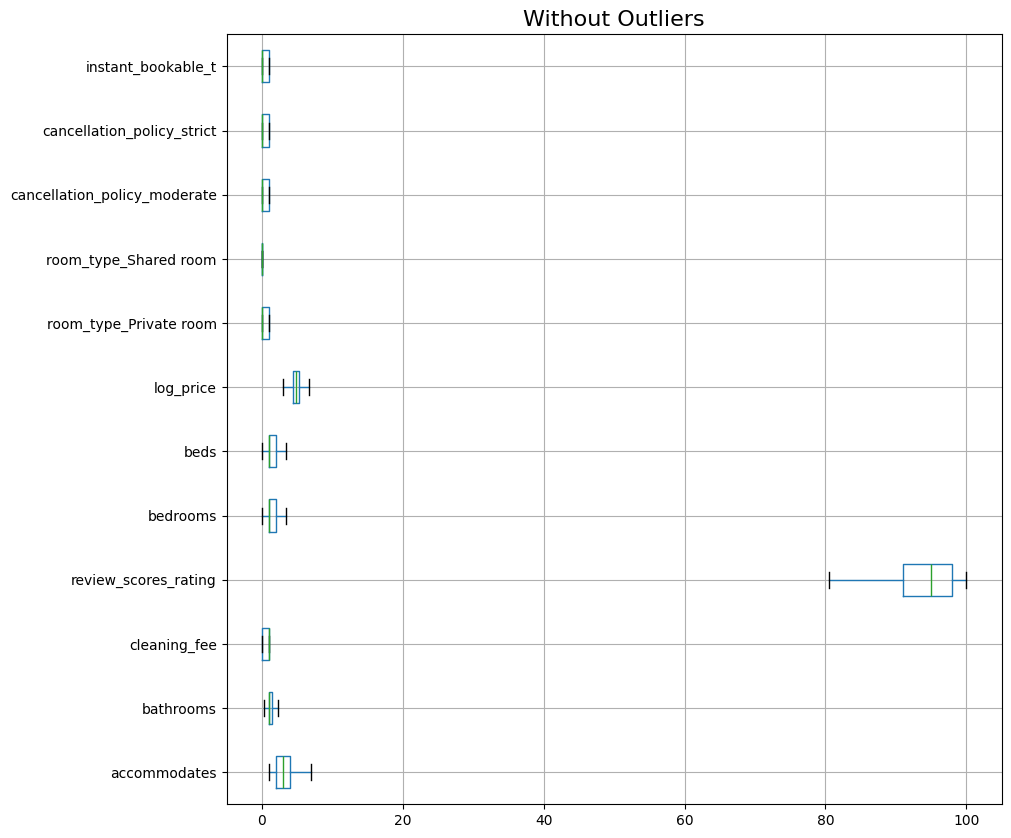

In [31]:
plt.figure(figsize=(10,10))
df_knn_out.boxplot(vert=0)
plt.title('Without Outliers',fontsize=16)
plt.show()

# Data Distribution

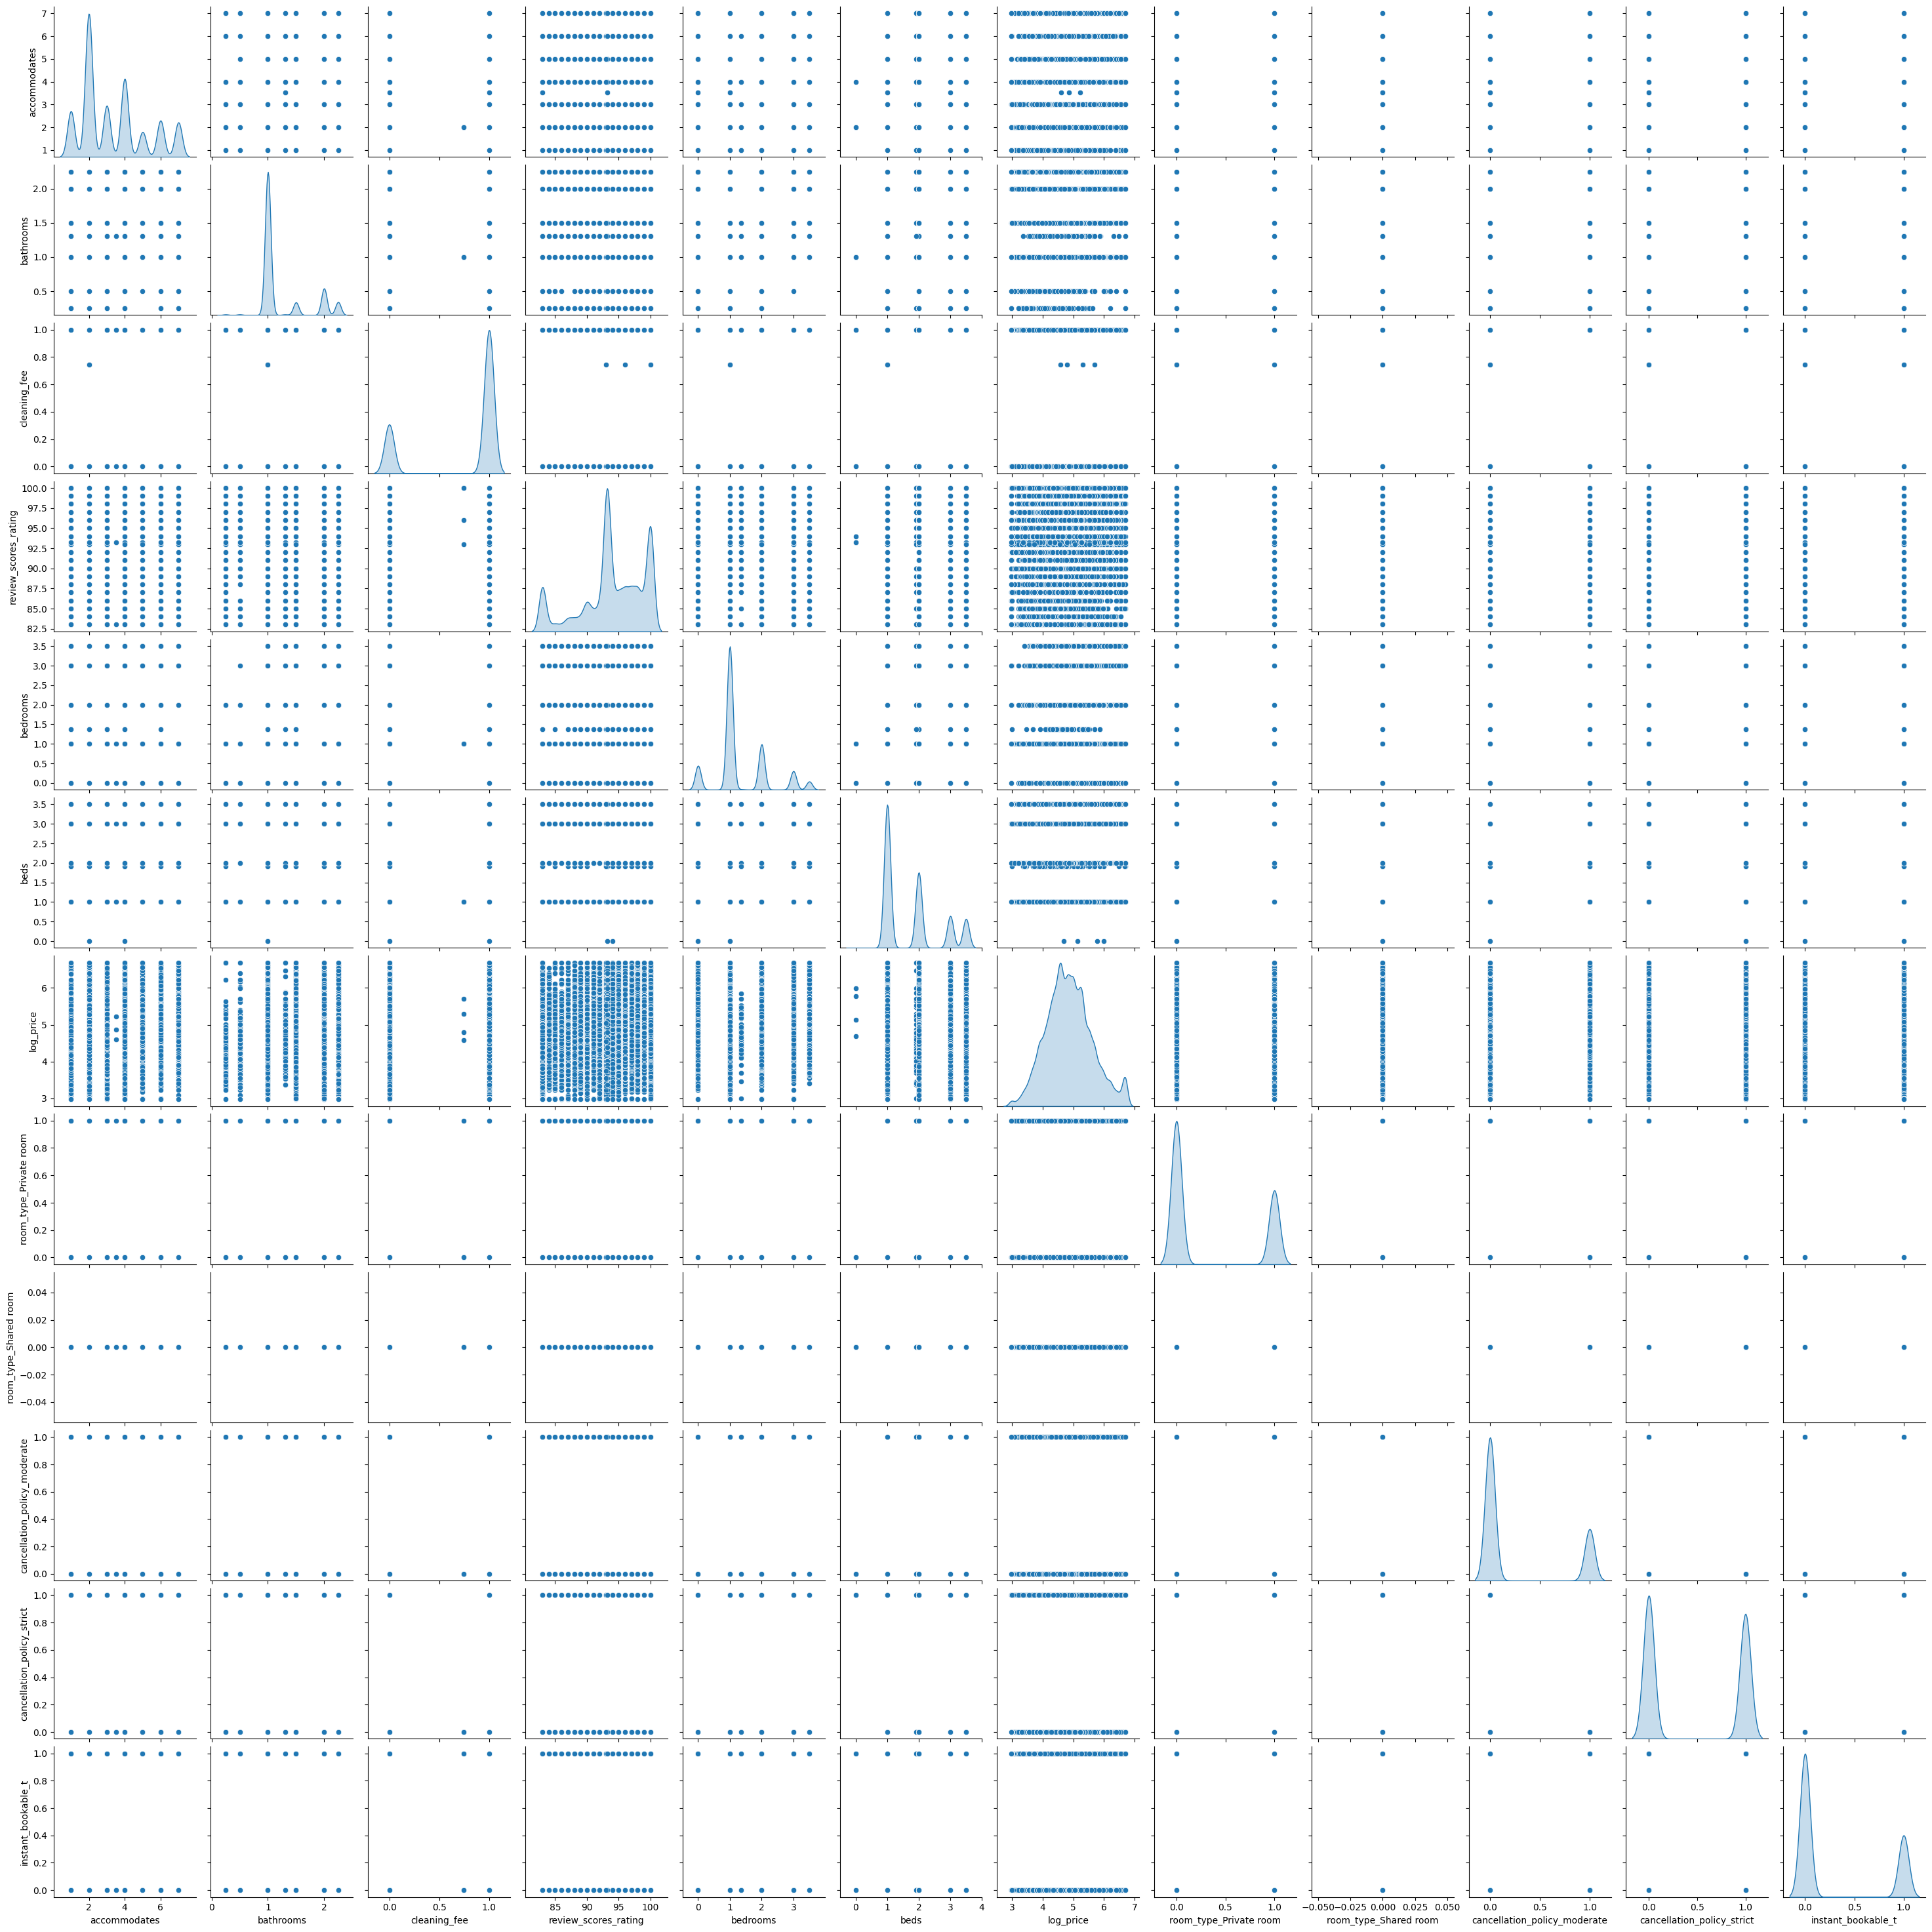

In [32]:
sns.pairplot(df_mean_out, diag_kind='kde')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

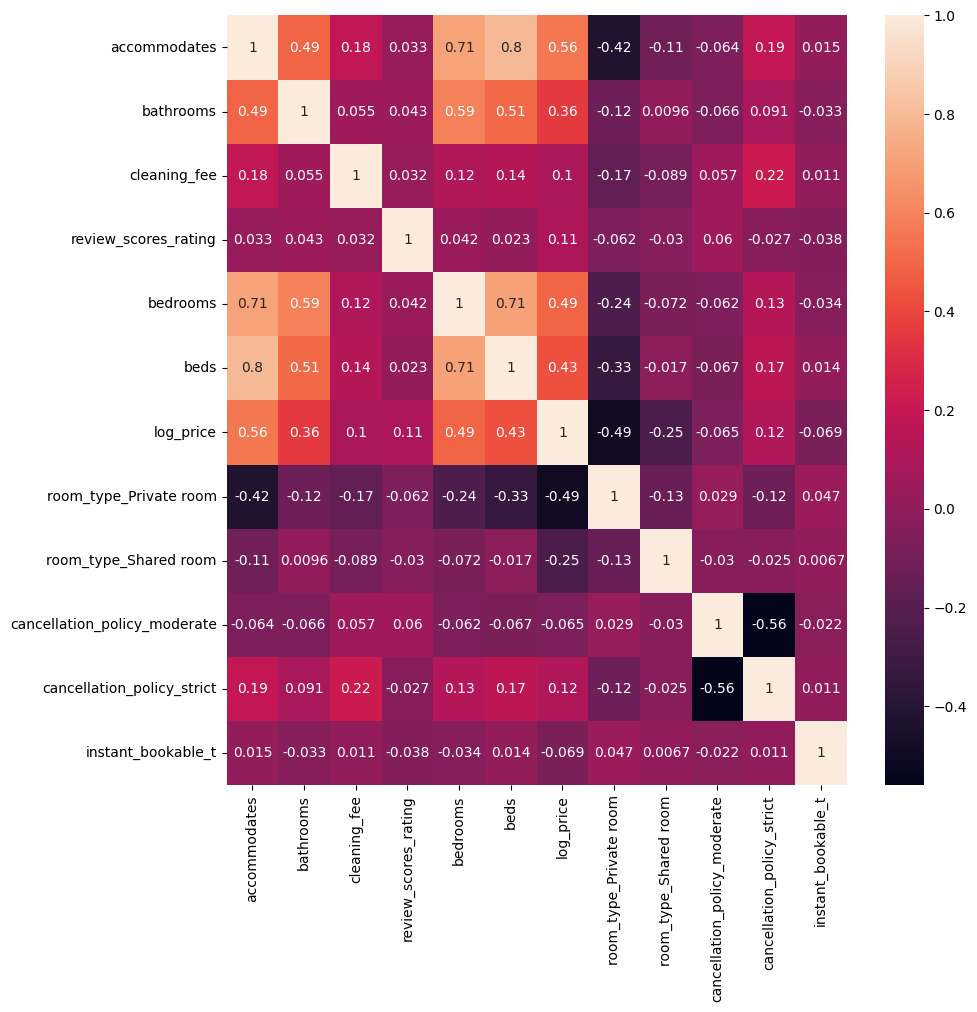

In [42]:
#heat correlation
plt.figure(figsize=(10,10))
sns.heatmap(df_mean.corr(),annot=True)

plt.show

# Train test split

df_mean_out 
df_mean.copy
df_med_out 
df_med.copy
df_knn_out df_knn.copy

# for mean_out

In [44]:
X = df_mean_out.drop('log_price', axis=1)

# Copy target into the y dataframe. 
y = df_mean_out[['log_price']]

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [46]:
regression_model = LinearRegression()

regression_model.fit(X_train, y_train)

LinearRegression()

In [47]:
regression_model.score(X_train, y_train)

0.4453405404485786

# for mean 

In [48]:
X = df_mean.drop('log_price', axis=1)

# Copy target into the y dataframe. 
y = df_mean[['log_price']]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [50]:
regression_model.fit(X_train, y_train)

LinearRegression()

In [51]:
regression_model.score(X_train, y_train)

0.5026453886994027

# for median_out

In [52]:
X = df_med_out.drop('log_price', axis=1)

# Copy target into the y dataframe. 
y = df_med_out[['log_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

regression_model.fit(X_train, y_train)

regression_model.score(X_train, y_train)

0.4482835745841216

# for median

In [53]:
X = df_med.drop('log_price', axis=1)

# Copy target into the y dataframe. 
y = df_med[['log_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

regression_model.fit(X_train, y_train)

regression_model.score(X_train, y_train)

0.5041739382604415

# for Knn_out

In [54]:
X = df_knn_out.drop('log_price', axis=1)

# Copy target into the y dataframe. 
y = df_knn_out[['log_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

regression_model.fit(X_train, y_train)

regression_model.score(X_train, y_train)

0.4508367867095684

# for Knn

In [55]:
X = df_knn.drop('log_price', axis=1)

# Copy target into the y dataframe. 
y = df_knn[['log_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

regression_model.fit(X_train, y_train)

regression_model.score(X_train, y_train)

0.5053527126502217

# ols model(stats model)

In [56]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t,log_price
25136,7.0,1.0,0.0,100.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,4.709530
6288,1.0,2.0,0.0,99.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,3.806662
36561,2.0,1.0,0.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,4.844187
2034,16.0,1.0,1.0,100.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6.396930
21668,3.0,1.0,0.0,95.8,1.0,1.0,0.0,1.0,0.0,1.0,1.0,4.499810


In [67]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for accommodates is 0.07466541567905553
The coefficient for bathrooms is 0.15363283513208897
The coefficient for cleaning_fee is -0.09042282245632274
The coefficient for review_scores_rating is 0.007684611768477928
The coefficient for bedrooms is 0.1543378420673411
The coefficient for beds is -0.05022309102168221
The coefficient for room_type_Private room is -0.6460917450449352
The coefficient for room_type_Shared room is -1.0947561343923962
The coefficient for cancellation_policy_moderate is -0.06884265372648896
The coefficient for cancellation_policy_strict is -0.013587832349667522
The coefficient for instant_bookable_t is -0.05669312572319907


In [68]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3.9365866065595783
